# <center>Medición del error</center>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('Datos.csv')
df = df[['reales','predichos']][0:100]
print(df.size)
df.head(3)

200


,reales,predichos
0,113.0,66.0
1,141.0,90.0
2,118.0,111.0


### Mean Square Error (MSE)
#### Es el método más comúnmente utilizado para poder predecir el error. 
#### También se utiliza su raíz cuadrada, llamadas root means-squared error

# MSE =  $ \frac{(p_{i}-a_{i})^2 +...+ (p_{n}-a_{n})^2}  {n}     $
# RMSE $ \sqrt\frac{(p_{i}-a_{i})^2 +...+ (p_{n}-a_{n})^2}  {n}     $

In [3]:
numero_datos = len(df)

In [4]:
inicio = time.time()
sumatoria = 0

#función para calcular la diferencia entre p y a, y elevar el resultado al cuadrado
def diferencia_cuadrada_potencia(p_i,a_i):
    return  (p_i - a_i)**2

#Calcular para todas las instancias
for i in range(0,numero_datos):
    sumatoria += diferencia_cuadrada_potencia(df['predichos'][i],df['reales'][i])
     
MSE = sumatoria/numero_datos
RMSE = math.sqrt(MSE)
fin = time.time()

print('MSE = ',MSE)
print('RMSE = ',RMSE)

T_MSE_RMSE = (fin-inicio)

MSE =  707.6
RMSE =  26.600751869073175


### Mean Absolute Error (MAE)
#### Es una medida que solo promedia las magnitudes de cada error de manera individual sin tener en cuenta su signo.
#### Los outliers no son exagerados.

# MAE =  $ \frac{|p_{i}-a_{i}| +...+ |p_{n}-a_{n}|}  {n}     $

In [5]:
sumatoria = 0
inicio = time.time()
#función para calcular el valor absoluto de la diferencia entre p y a
def diferencia_abs(p_i,a_i):
    return  abs(p_i - a_i)

#Calcular para todas las instancias
for i in range(0,numero_datos):
    sumatoria += diferencia_abs(df['predichos'][i],df['reales'][i])

MAE = sumatoria/numero_datos
fin = time.time()

print('MAE = ',MAE)
T_MAE = (fin-inicio)

MAE =  19.16


### Relative Squared Error (RSE)
#### Se promedian todos los valores obtenidos con respecto a los valores de entrenamiento (p), por lo que RSE toma todos los errores al cuadrado y los normaliza dividiendo todos los errores del predictor


# RSE =  $ \frac{(p_{i}-a_{i})^2 +...+ (p_{n}-a_{n})^2}  {(a_{i}-\overline a)^2 +...+ (a_{n}-\overline a)^2} $

#### where $  \overline a = \frac{1}{n}  \sum a_{i}$

In [6]:
inicio = time.time()
# a_negada = promedio de a
promedio_a_n = df['reales'].sum()
promedio_a_n /= numero_datos


dividendo = 0
divisor = 0


#Calcular para todas las instancias
for i in range(0,numero_datos):
    dividendo += diferencia_cuadrada_potencia(df['predichos'][i],df['reales'][i])
    

for j in range(0,numero_datos):
    divisor += diferencia_cuadrada_potencia(df['reales'][j],promedio_a_n)
    
    
    
RSE = dividendo/divisor
RRSE = math.sqrt(RSE)
fin = time.time()

print('RSE = ',round(RSE,4))
print('RRSE = ',round(RRSE,4))
T_RSE = (fin-inicio)

RSE =  0.4185
RRSE =  0.6469


### Relative Absolute Error (RAE)
#### Es el valor error absoluto, normalizado de la misma manera que con MAE

# RAE =  $ \frac{|p_{i}-a_{i}| +...+ |p_{n}-a_{n}|}  {|a_{i}-\overline a| +...+ |a_{n}-\overline a|}     $

In [7]:
inicio = time.time()

dividendo = 0
divisor = 0

#Calcular para todas las instancias
for i in range(0,numero_datos):
    dividendo += diferencia_abs(df['predichos'][i],df['reales'][i])
    
for j in range(0,numero_datos):
    divisor += diferencia_abs(df['reales'][j],promedio_a_n)

RAE = dividendo/divisor
fin = time.time()

print('RAE = ',RAE)
T_RAE = (fin-inicio)

RAE =  0.6333381814335386


### Correlation Coefficient (CC)
#### Mide la correlación estadistica entre los valores actuales (a) y los valores predichos (p).
#### El coeficiente de correlación varia de 1 para un resultado de correlacion perfecto a un 0, donde no existe correlación o -1 cuando la correlación es perfecto pero negativo.

#### Correlation coefficient:

## $ \frac{S_{pa}}{\sqrt{ S_{p}S_{a}} } $

#### where 

$ S_{pa} = \frac {\sum (p-\overline p)(a- \overline a)}{n-1}$

In [8]:
inicio = time.time()
# p_negada = promedio de p
promedio_p_n = df['predichos'].sum()
promedio_p_n /= numero_datos

In [9]:
def suma_producto_spa(p, p_n, a, a_n):
    return (p-p_n)*(a-a_n)

sumatoria_spa = 0

for i in range(0,numero_datos):
    sumatoria_spa += suma_producto_spa(df['predichos'][i],promedio_p_n,df['reales'][i],promedio_a_n)
    
s_pa = sumatoria_spa/(numero_datos-1)

$ S_{p} = \frac {\sum (p-\overline p)^2}{n-1}$

In [10]:
p_prom = 0
for j in range(0,numero_datos):
    p_prom += diferencia_cuadrada_potencia(df['predichos'][j],promedio_p_n)
s_p = p_prom/(numero_datos-1)

$ S_{a} = \frac {\sum (a-\overline a)^2}{n-1}$

In [11]:
a_prom = 0
for k in range(0,numero_datos):
    a_prom += diferencia_cuadrada_potencia(df['reales'][k],promedio_a_n)
s_a = a_prom/(numero_datos-1)

##  Correlation Coefficient (CC) = $ \frac{S_{pa}}{\sqrt( S_{p}S_{a}) } $

In [12]:
CC = s_pa/( math.sqrt(s_p*s_a) )
fin = time.time()

print('CC = ',CC)
T_CC = (fin-inicio)

CC =  0.8158317676525696


## Medida de medición del error
### <li>En general, se utiliza de manera indistinta la medición del error o por defecto se utiliza RMSE. En realidad, no existe una receceta para siempre utlizar un método en particular, sino que se dependerá de los datos, la aplicación , etcétera.
### <li> Se tiene que preguntar: ¿Qué se está tratando de minimizar?<ol>
### <li> ¿Cuál es el costo que representa el resultado (y los cálculos) de cada uno de los método <ol>
### <li> ¿Cuándo es más útil utilizar un método con respecto a los otros?<ol>

In [13]:
print('Valor de los errores calculados')
print('Mean Square Error: ',MSE)
print('Roor Mean Scuare Error: ',RMSE)
print('Mean Absolute Error: ',MAE)
print('Relative Squared Error: ',RSE)
print('Root Relative Squared Error: ',RRSE)
print('Relative Absolute Error: ',RAE)
print('Correlation Coefficient: ',CC)

Valor de los errores calculados
Mean Square Error:  707.6
Roor Mean Scuare Error:  26.600751869073175
Mean Absolute Error:  19.16
Relative Squared Error:  0.4184889556116051
Root Relative Squared Error:  0.6469072233416513
Relative Absolute Error:  0.6333381814335386
Correlation Coefficient:  0.8158317676525696


### No se esta tratando de minimizar nada, lo que se trata es de calcular el error en los algoritmos, mediante los diferentes métodos, para posteriormente tratar de minimizar la señal de error algo así como un sistema de control.

### Costo que representa:

In [14]:
print('Tiempos')
print('MSE y RMSE: ',T_MSE_RMSE)
print('MAE: ',T_MAE)
print('RSE: ',T_RSE)
print('RAE: ',T_RAE)
print('CC: ',T_CC)

Tiempos
MSE y RMSE:  0.0019998550415039062
MAE:  0.0019979476928710938
RSE:  0.002000093460083008
RAE:  0.0019996166229248047
CC:  0.06251144409179688


### El dataset es pequeño y se muestran los tiempos de ejecución los cuales son muy bajos, con un conjunto de datos más grande se podría apreciar mejor la duración de estos, pero se espera que MSE , RMSE , MAE tengan menor tiempo de ejecución ya que se definen menos operaciones.

### Su utilidad correspondera a lo que se busca calcular.

### MSE: proporciona una función cuadrática de pérdida en la medida en que eleva al cuadrado y, posteriormente, promedia los varios errores; lo cual le da mucho más peso a los grandes errores (valores atípicos) que a los más pequeños.

### MAE: Este criterio es similar al coeficiente RMSE. Sin embargo, es más robusto ya que es menos sensible a valores extremos que el MSE.

### Todas las medidas de distancia (MSE, RMSE y MAE) son equivalentes y permiten cuantificar cómo las soluciones aproximadas coinciden con los datos simulados. Un valor pequeño para estos criterios significa que el modelo estimado puede predecir los valores de la respuesta del modelo más complejo.

### RSE: El error cuadrático relativo (RSE) es relativo a lo que habría sido si se hubiera utilizado un predictor simple. Más específicamente, este simple predictor es solo el promedio de los valores reales. Por lo tanto, el error cuadrático relativo toma el error cuadrático total y lo normaliza dividiéndolo por el error cuadrático total del predictor simple. Se puede comparar entre modelos cuyos errores se miden en las diferentes unidades.

### RAE: Es una forma de medir el rendimiento de un modelo predictivo. No debe confundirse con el error relativo, que es una medida general de precisión o exactitud para instrumentos como relojes, reglas o escalas. Se expresa como una razón, comparando un error medio (residual) con los errores producidos por un modelo trivial o ingenuo. Un buen modelo de pronóstico producirá un índice cercano a cero; Un modelo deficiente (uno que es peor que el modelo ingenuo) producirá una proporción mayor que uno.

### CC: Para dos variables, la fórmula compara la distancia de cada dato puntual respecto a la media de la variable y utiliza esta comparación para decirnos hasta qué punto la relación entre las variables se ajusta a una línea imaginaria trazada entre los datos. A esto nos referimos cuando decimos que la correlación examina las relaciones lineales.

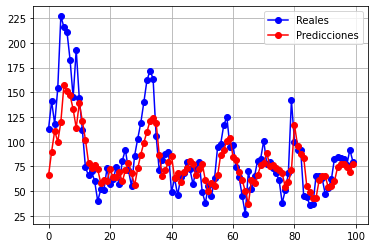

In [15]:
plt.plot(df['reales'],'-bo',label = 'Reales')
plt.plot(df['predichos'],'-ro',label = 'Predicciones')
plt.legend()
plt.grid()